In [1]:
import pandas as pd
from scipy import stats

In [50]:
df = pd.read_csv('Genus.csv', index_col=0)
g_list = ['A', 'B']
tmp_df = pd.DataFrame()
tmp_df['value'] = df.iloc[0]
tmp_df['group'] = ['_'.join(i.split('_')[:-1]) for i in df.columns]
g_values = [np.array(tmp_df[tmp_df['group'] == g]['value']) for g in g_list]
import numpy as np
g_values
# g1 = 'A'
# g2 = 'B'
# g1_sample = [i for i in df.columns if '_'.join(i.split('_')[:-1]) == g1]
# g2_sample = [i for i in df.columns if '_'.join(i.split('_')[:-1]) == g2]
# g1_sample
# g1_df = df.loc[:,g1_sample]
# g2_df = df.loc[:,g2_sample]

# newdf = pd.DataFrame()
# newdf[f'{g1}_MeanRel(%)'] = g1_df.mean(axis=1) * 100
# newdf[f'{g2}_MeanRel(%)'] = g2_df.mean(axis=1) * 100
# pvalue = [stats.ttest_ind(list(i), list(j), equal_var = False)[1] for i, j in zip(g1_df.values, g2_df.values)]
# newdf['Pvalue'] = pvalue
# dp = [(float(sum(i)) / len(i) - float(sum(j)) / len(j)) * 100 for i, j in zip(g1_df.values, g2_df.values)]
# newdf['Difference between means'] = dp

# interval = [ci(i, j, 0.95) for i, j in zip(g1_df.values, g2_df.values)]
# lower = [i[0] * 100 for i in interval]
# upper = [i[1] * 100 for i in interval]
# newdf['95% lowerCI'] = lower
# newdf['95% upperCI'] = upper
# newdf.sort_values('Pvalue', inplace=True)

# newdf.index.name = 'Genus'
# newdf.to_csv('t-test.csv')
# newdf

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58863806e-05,
        0.00000000e+00, 0.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.40439576e-05, 0.00000000e+00,
        5.76593199e-05, 0.00000000e+00])]

In [12]:
newdf = pd.DataFrame()
g1 = df.iloc[:,:10]
g2 = df.iloc[:,10 :]
g2.head()

,B_1,B_10,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9
g__1-68,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000014,0.000000,0.000058,0.000000
g__AF12,0.000000,0.000000,0.000000,0.000053,0.000014,0.000000,0.000000,0.000144,0.000360,0.000016
g__Abiotrophia,0.000014,0.000000,0.000017,0.000093,0.000000,0.000000,0.000042,0.000000,0.000000,0.000016
g__Acidaminococcus,0.000422,0.000237,0.000157,0.000227,0.000084,0.000157,0.006544,0.000197,0.000173,0.000096
g__Actinomyces,0.000239,0.000063,0.000122,0.000321,0.000084,0.000063,0.000183,0.000162,0.000058,0.000032


In [13]:
newdf['g1_aver'] = g1.mean(axis=1) * 100
newdf['g2_aver'] = g2.mean(axis=1) * 100

pvalue = [stats.ttest_ind(list(i), list(j), equal_var = False)[1] for i, j in zip(g1.values, g2.values)]
newdf['pvalue'] = pvalue
newdf.head()

,g1_aver,g2_aver,pvalue
g__1-68,0.000159,0.000717,0.373045
g__AF12,0.001687,0.005874,0.293535
g__Abiotrophia,0.001648,0.001831,0.881315
g__Acidaminococcus,0.079053,0.082950,0.964299
g__Actinomyces,0.040003,0.013257,0.111831


In [14]:
import scipy
import math
import numpy as np
from numpy import mean
from numpy import var
from scipy.stats.distributions import t

def ci(seqGroup1, seqGroup2, coverage):
         
        n1 = len(seqGroup1)
        n2 = len(seqGroup2)
                      
        # calculate p-value, effect size, and CI
        meanG1 = float(sum(seqGroup1)) / n1
        meanG2 = float(sum(seqGroup2)) / n2
        dp = meanG1 - meanG2

        varG1 = var(seqGroup1, ddof=1)
        varG2 = var(seqGroup2, ddof=1)

        normVarG1 = varG1 / n1
        normVarG2 = varG2 / n2
        unpooledVar = normVarG1 + normVarG2
        sqrtUnpooledVar = math.sqrt(unpooledVar)

#         T_statistic = (meanG1 - meanG2) / sqrtUnpooledVar
        dof = (unpooledVar*unpooledVar) / ( (normVarG1*normVarG1)/(n1-1) + (normVarG2*normVarG2)/(n2-1) )
#         pValue = t.cdf(T_statistic, dof)

        # CI
        tCritical = t.isf(0.5 * (1.0-coverage), dof) # 0.5 factor accounts from symmetric nature of distribution
        lowerCI = dp - tCritical*sqrtUnpooledVar
        upperCI = dp + tCritical*sqrtUnpooledVar
        return lowerCI, upperCI
    
interval = [ci(i, j, 0.95) for i, j in zip(g1.values, g2.values)]
lower = [i[0] * 100 for i in interval]
upper = [i[1] * 100 for i in interval]
newdf['95% lower'] = lower
newdf['95% upper'] = upper

dp = [(float(sum(i)) / len(i) - float(sum(j)) / len(j)) * 100 for i, j in zip(g1.values, g2.values)]
newdf['dp'] = dp

newdf.head()

,g1_aver,g2_aver,pvalue,95% lower,95% upper,dp
g__1-68,0.000159,0.000717,0.373045,-0.001888,0.000772,-0.000558
g__AF12,0.001687,0.005874,0.293535,-0.012573,0.004199,-0.004187
g__Abiotrophia,0.001648,0.001831,0.881315,-0.002741,0.002373,-0.000184
g__Acidaminococcus,0.079053,0.082950,0.964299,-0.184389,0.176595,-0.003897
g__Actinomyces,0.040003,0.013257,0.111831,-0.007476,0.060968,0.026746


In [15]:
np.array([1,2,3]) - np.array([1,2,3])



array([0, 0, 0])

In [20]:
# data = newdf[newdf['pvalue'] < 0.05]
data = newdf
data.sort_values('pvalue', inplace=True)
data.index.name = 'Genus'
data.to_csv('test.csv')


data.head()

,g1_aver,g2_aver,pvalue,95% lower,95% upper,dp
Genus,,,,,,
g__Pyramidobacter,0.000445,0.004050,0.012139,-0.006241,-0.000968,-0.003605
g__Plesiomonas,0.001221,0.000000,0.018030,0.000264,0.002178,0.001221
g__Pseudoramibacter_Eubacterium,0.001870,0.018428,0.033935,-0.031565,-0.001550,-0.016557
g__Rothia,0.089578,0.019840,0.042654,0.002781,0.136696,0.069738
g__Oscillospira,1.004689,1.860765,0.043761,-1.685009,-0.027143,-0.856076


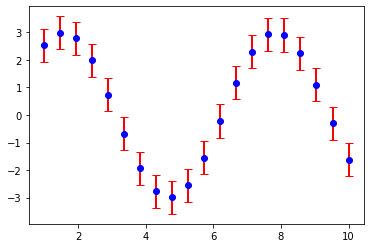

In [1]:
# from matplotlib.backends.backend_qt4agg import FigureCanvasQTAgg as FigureCanvas
# from matplotlib.figure import Figure
# import matplotlib.transforms as mtransforms

# import numpy as np

# fig = Figure(facecolor='white', dpi=96)

# imageWidth = 7
# imageHeight = 7
# fig.set_size_inches(imageWidth, imageHeight)
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(1,10,20)
dy=0.6
y=np.sin(x)*3

plt.errorbar(x,y,yerr=dy,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.show()


In [7]:
a = 'A_1'
a.split('_')[:-1]

['A']